Exercício Computacional

In [1]:
import numpy as np
import pandas as pd
K = 20
data_file = open('sunspot.txt');
data = data_file.read().split('\n');
months = []
years = {}
for i in range(0,len(data)-1):
    line = data[i]
    line = line.split(' ')
    line = list(filter(len, line))
    years[int(line[0])] = [float(i) for i in line[1:13]]
    months.extend(line[1:13])

months = [float(i) for i in months]

data_months_array = np.array(months)
data_trainning = data_months_array[0:data_months_array.size-60]

y_test = data_months_array[data_months_array.size-60:data_months_array.size]
y_trainning = data_trainning[20:]

phi = np.array([])

for x in range(K-1,data_trainning.size-1):
    temp = np.array([1])
    for y in range(0,K):
        temp = np.append(temp,data_months_array[x-y])
    phi = np.append(phi,temp)

phi_lines = int(phi.size/(K+1))
phi = phi.reshape(phi_lines,K+1)
y_trainning = y_trainning.reshape(y_trainning.size,1)

In [2]:
W = np.dot(np.dot(np.linalg.inv(np.dot(phi.transpose(),phi)),phi.transpose()),y_trainning)

Recalculando a matriz Phi para as amostras de teste, temos abaixo:

In [3]:
phi = np.array([])

for x in range(data_months_array.size-60-1,data_months_array.size-1):
    temp = np.array([1])
    for y in range(0,K):
        temp = np.append(temp,data_months_array[x-y])
    phi = np.append(phi,temp)

phi_lines = int(phi.size/(K+1))
phi = phi.reshape(phi_lines,K+1)
y_trainning = y_trainning.reshape(y_trainning.size,1)

In [4]:
y_pred = np.dot(phi,W)

In [5]:
import matplotlib
import matplotlib.pyplot as plt 

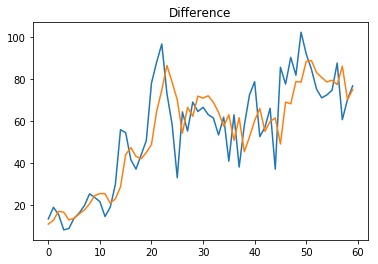

In [6]:
plt.plot(y_test)
plt.plot(y_pred)
plt.title('Difference')
plt.show()